In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

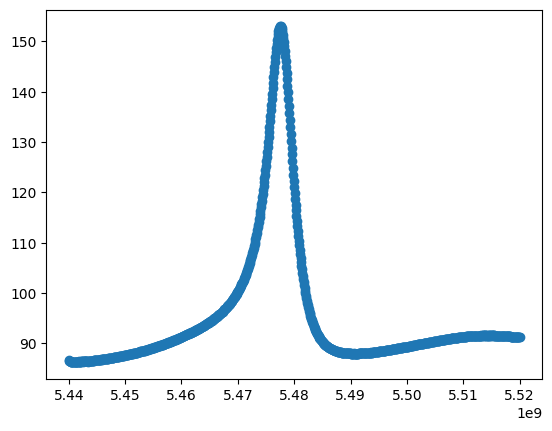

In [2]:
# Read data 
path = '../Data/fit_test/Resonances/20mK_-5dBm.txt'
raw_data = np.loadtxt(path, delimiter=' ', skiprows=0)
transmission_squared_data = raw_data[:,1]**2

plt.plot(raw_data[:,0], transmission_squared_data, 'o')

In [3]:
def transmission_squared(f, A1, A2, A3, A4, fr, Qr):
    delta_f = f - fr
    return A1 + A2 * delta_f + (A3 + A4 * delta_f) / (1 + 4 * Qr**2 * (delta_f / fr)**2)


# Chi-square cost function for iminuit
def chi_square(A1, A2, A3, A4, fr, Qr):
    model = transmission_squared(f, A1, A2, A3, A4, fr, Qr)
    residuals = (transmission_squared_data - model)
    # We dont have any information about the error of the data points
    transmission_squared_data_error = np.ones_like(transmission_squared_data)
    chi2 = np.sum((residuals / transmission_squared_data_error)**2)
    return chi2

In [4]:
# Fit data
A1_init = 1
A2_init = 1
A3_init = 1
A4_init = 1
fr_init = 5.477e9
Qr_init = 900

p0 = [A1_init, A2_init, A3_init, A4_init, fr_init, Qr_init]

f = raw_data[:,0]

popt, pcov = curve_fit(transmission_squared, f, transmission_squared_data, p0=p0)
popt

array([ 8.84362918e+01,  1.14882494e-07,  6.26807624e+01, -7.77889029e-06,
        5.47808711e+09,  1.00365205e+03])

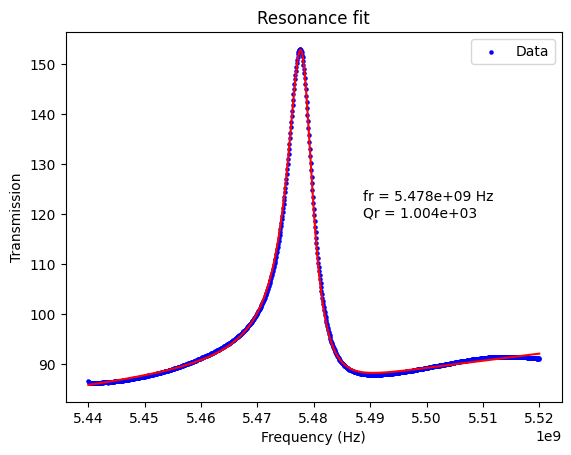

In [15]:
# Plot fit
plt.plot(f, transmission_squared(f, *popt), 'r')
plt.scatter(f, transmission_squared_data, c='b', s=5, label='Data')
# Add text to say fr and Qr and their errors
plt.text(0.6, 0.5, 'fr = {:.3e} Hz\nQr = {:.3e}'.format(popt[4], popt[5]), transform=plt.gca().transAxes)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission')
plt.title('Resonance fit')
plt.legend()
plt.show()

In [5]:
from iminuit import Minuit

f = raw_data[:,0]

# Initial parameter guesses
A1_init, A2_init, A3_init, A4_init, fr_init, Qr_init = 1, 1, 1, 1, 5.477e9, 900

# Initialize Minuit
minuit = Minuit(chi_square, A1=A1_init, A2=A2_init, A3=A3_init, A4=A4_init, fr=fr_init, Qr=Qr_init)

# Fit using Minuit
minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 136.4                      │             Nfcn = 1358              │
│ EDM = 8.51e-07 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A1   │   88.44   │   0.04    │            │            │         │         │       │
│ 1 │ A2   │ 114.9e-9  │  1.8e-9   │            │            │         │         │       │
│ 2 │ A3   │   62.68   │   0.20    │            │            │         │         │       │
│ 3 │ A4   │ -7.78e-6  │  0.10e-6  │            │            │         │         │       │
│ 4 │ fr   │5.478087e9 │0.000013e9 │            │            │         │         │       │
│ 5 │ Qr   │  1.004e3  │  0.005e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │                  A1                  A2                  A3                  A4                  fr                  Qr │
├────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ A1 │             0.00158      -6.7361593e-12             -0.0008        -1.117973e-9             67.7092              0.0793 │
│ A2 │      -6.7361593e-12            3.18e-18     -84.6689446e-12           -87.6e-18 10.8531204392083e-6    -1.8310923685e-9 │
│ A3 │             -0.0008     -84.6689446e-12              0.0412        -237.964e-12             -968.99                0.56 │
│ A4 │        -1.117973e-9           -87.6e-18        -237.964e-12             1.1e-14   -968.136301636e-6      -190.638281e-9 │
│ fr │             67.7092 10.8531204392083e-6             -968.99   -968.136301636e-6             1.8e+08            -5.569e3 │
│ Qr │              0.0793    -1.8310923685e-9                0.56      -190.638281e-9            -5.569e3                  22 │
└────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

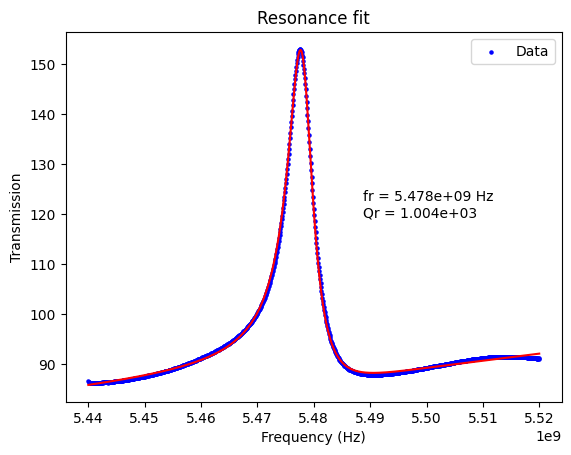

In [6]:
# Extract fit parameters
best_fit_params = minuit.values
best_fit_params_dict = best_fit_params.to_dict()
params_list = list(best_fit_params_dict.values())

# Plot fit
plt.plot(f, transmission_squared(f, *params_list), 'r')
plt.scatter(f, transmission_squared_data, c='b', s=5, label='Data')
# Add text to say fr and Qr and their errors
plt.text(0.6, 0.5, 'fr = {:.3e} Hz\nQr = {:.3e}'.format(best_fit_params_dict['fr'], best_fit_params_dict['Qr']), transform=plt.gca().transAxes)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission')
plt.title('Resonance fit')
plt.legend()
plt.show()

## Testing the fitting library

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from fitting import fit_S21, plot_fit, get_fit_params_list

In [2]:
path = '../Data/fit_test/Resonances/20mK_-5dBm.txt'
data = np.loadtxt(path, delimiter=' ', skiprows=0)
f = data[:,0]
y = data[:,1]

# Convert to linear scale
y = 10**(y/20)

# Fit data
minuit_res = fit_S21(f, y)

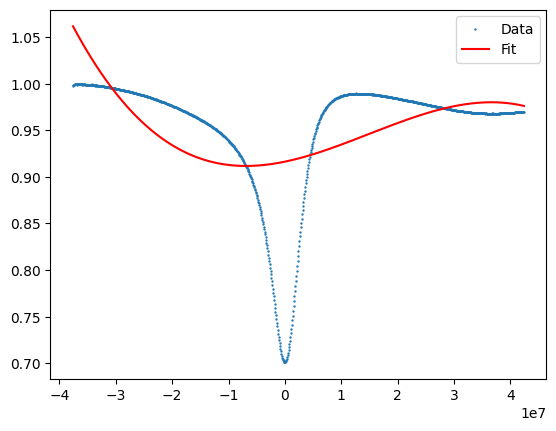

In [3]:
# Plot fit
x = f.copy()
x -= x[np.argmin(y)]
#x /= np.max(x)
plot_fit(minuit_res, x, y, s=2, marker='.')